# Group Members


1. 115325 Dennis Kipkorir Koech
2. 121058 Faith Sanne Odhiambo
3. 121788 Alumasa Rees
4. 118300 Kenneth Temba Lumuli
5. 102851 Maria Gitau
6. 118640 Tevin Musau Mutua


## **LAB ACTIVITY 1**

## **What is FLEX, YACC, LEX and BISON**

# FLEX - Fast Lexical Analyzer:
FLEX is a computer program designed by Vern Paxon in 1987 for generating lexical analyzers. Written in C, Flex is more flexible than LEX and YACC while also producing faster code. The program structure of Flex is divided into three sections: **the definition section**, which contains the declaration of variables, regular definitions, manifest constants all of which are enclosed in "%{}%"; **the rules section**, which contains a series of rules in the form of pattern and action which areeonclosed in "%%%%"; and **the user code section** which contains C statements and additional functions.
Flex is a tool for generating scanners, thus to perform this:
 - Flex reads the given input files, or its standard input, if no file names are given, for a description of a desired scanner to generate. The description is in the form of pairs of regular expressions and C code, called rules. 
 - Flex generates as output a C source file, lex.yy.c, which defines a routine yylex(). 
 - This file is compiled and linked with the -lfl library to produce an executable. 
 - When the executable is run, it analyzes its input for occurrences of the regular expressions. 
 - Whenever it finds one, it executes the corresponding C code.


An example of Flex Syntax:


In [ ]:
#The definition section which contains a single variable
%{
int count = 0;
%}
#The rules section ehich contains three rules
  #first rule matches with capital letters
  #second rule matches with any character except newline
  #third rule does not take input after the enter
%%
[A-Z] {printf("%s capital letter\n", yytext);
       count++;}
.     {printf("%s not a capital letter\n", yytext);}
\n    {return 0;}
%%
#Code Section prints the number of capital letter present in the given input
int yywrap(){}
int main(){
yylex();
printf("\nNumber of Capital letters " 
      "in the given input - %d\n", count);
  
return 0;
}

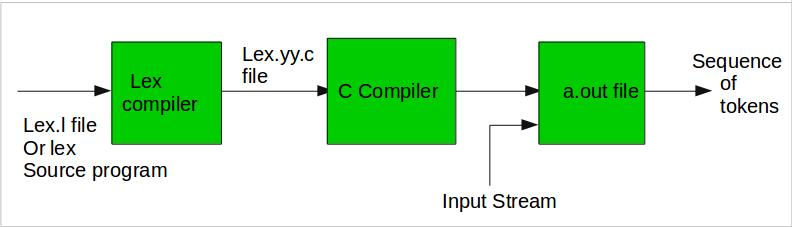

##YACC - Yet Another Compiler-Compiler
* Yacc is a computer program for the Unix Operating systems developed by Stephen C, Johnson. It is a Look Ahead Left-to-Right Rightmost Derivation (LALR) parser-generator. LALR parser-generators are desirable because they are very fast and small in comparison to other types of parsers. The program structure of Yacc is similar to Flex in that is is divided into three sections, those being the definitions, rules and user code.
* Yacc generates C code for a syntax analyzer, or parser. It uses grammar rules that allow it to analyze tokens from lex and create a syntax tree. A syntax tree imposes a hierarchical structure on tokens. 
* Code generation, does a depth-first walk of the
syntax tree to generate code.


YACC Diagram (Source: (Nachiappan, n.d.))

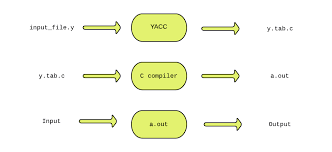

In [ ]:
%{
   include <ctype.h>
   include <stdio.h>
   define YYSTYPE double /* double type for yacc stack */
%}
 
%%
 Lines :  Lines S '\n' { printf("OK \n"); }
       |  S '\n’
       |  error '\n' {yyerror("Error: reenter last line:");
                        yyerrok; };
 S     :  '(' S ')’
       |  '[' S ']’
       |   /* empty */    ;
%%
 
include "lex.yy.c"
  
void yyerror(char * s)
/* yacc error handler */
{  
 fprintf (stderr, "%s\n", s);
}
  
int main(void)
 {
 return yyparse();
 } 

#LEX - Lexical Analyser Generator
* Lex is a program that generates lexical analyzer that reads the input stream and produces the source code as output through implementing the lexical analyzer in the C program (LEX - Javatpoint, n.d.). 
* Lex generates C code for a lexical analyzer, or scanner. It uses patterns that match strings in the input and converts the strings to tokens. Tokens are numerical representations of strings, and simplify processing.
* It is used with YACC parser generator. Lex File format follows the same format as Flex and Yacc, in that it is divided into three sections of definitions, rules and user code functions.

A diagram representing Lex (Source: ):

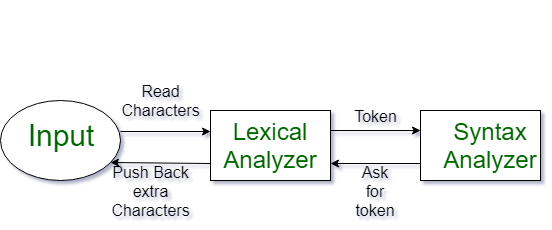

In [ ]:
/*Declarations section start here*/

/* Auxiliary declarations start here*/

%{
	include <stdio.h>
	int global_variable;
%}

/*Auxiliary declarations end & Regular definitions start here*/

    number [0-9]+           //Regular definition
    op     [-|+|*|/|^|=]    //Regular definition

/*Declarations section ends here*/

%%

/* Rules */

%%

/* Auxiliary functions */

#BISON
* Bison is a general-purpose parser generator that converts a grammar description (Bison Grammar Files) for an LALR(1) context-free grammar into a C program to parse that grammar. 
* It is a bottom-up parser whereby it attempts, by shifts and reductions, to reduce the entire input down to a single grouping whose symbol is the grammar's start-symbol. 
* Bison is designed for use with C code and generates a parser written in C that is configured for use in conjunction with a flex-­generated scanner.

Source: Gao, 2022.

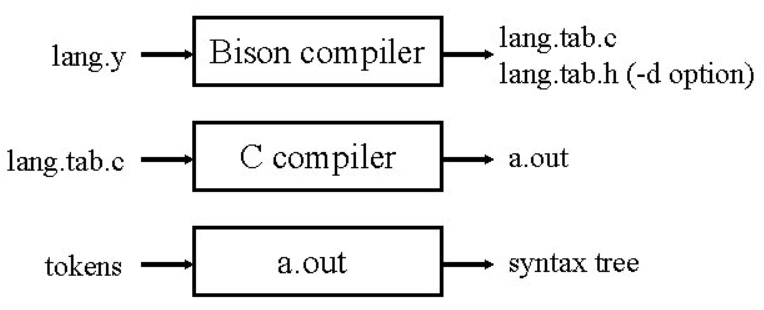

* The structure of the bison input file is shown below:
```
{
Prologue/C Declaration
%}
Bison Declarations
%%
Grammar Rule/Productions
%%
Epilogue/Additional C Code/User subroutines
```

* Below is a sample code snippet for a simple calculator that recognizes and evaluates binary postfix expressions using a stack:

In [ ]:
%{
 #include <stdio.h>
 #include <assert.h>
 static int Pop();
 static int Top();
 static void Push(int val);
%}
%token T_Int
%%
S : S E '\n' { printf("= %d\n", Top()); }
 |
 ;
E : E E '+' { Push(Pop() + Pop()); }
 | E E '-' { int op2 = Pop(); Push(Pop() - op2); }
 | E E '*' { Push(Pop() * Pop()); }
 | E E '/' { int op2 = Pop(); Push(Pop() / op2); }
 | T_Int { Push(yylval); }
 ;
%%
3
static int stack[100], count = 0;
static int Pop() {
 assert(count > 0);
 return stack[--count];
}
static int Top() {
 assert(count > 0);
 return stack[count-1];
}
static void Push(int val) {
 assert(count < sizeof(stack)/sizeof(*stack));
 stack[count++] = val;
}
int main() {
 return yyparse();
}

# References
1. GeeksforGeeks. (2022, June 28). Flex (Fast Lexical Analyzer Generator ). Retrieved September 9, 2022, from https://www.geeksforgeeks.org/flex-fast-lexical-analyzer-generator/
2. Paxson, V. (1995, April). Flex (2.5) [Software]. https://www.di.uminho.pt/~prh/FlexTutorial.pdf
3. YACC. (n.d.). Retrieved September 9, 2022, from https://silcnitc.github.io/yacc.html
4. A Guide to Lex & Yacc. (2011). In NC State University. Retrieved September 9, 2022, from https://arcb.csc.ncsu.edu/~mueller/compiler/compiler13/hw/hw1/y_man.pdf
5. Levine, J. R. (2013). Flex &amp; Bison. O'Reilly
6. Biswas, G. (2016). Yacc/Bison. Lecture
7. Johnson, M. (2012, July). Introduction to Bison. Lecture
8. Gao, L. (2022). Bison Tutorial. Bison tutorial. Retrieved September 15, 2022, from http://alumni.cs.ucr.edu/~lgao/teaching/bison.html

## **LAB ACTIVITY 2**

QUESTION 1

Example 1

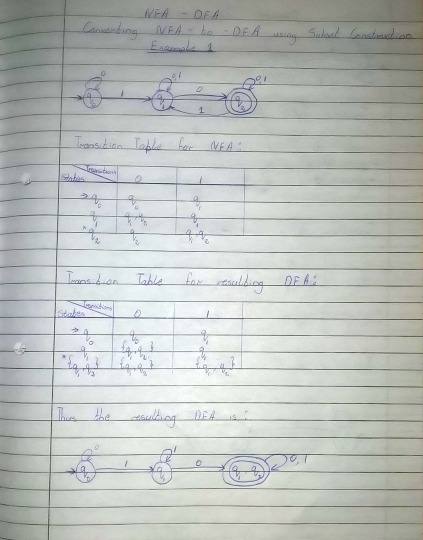

Example 2

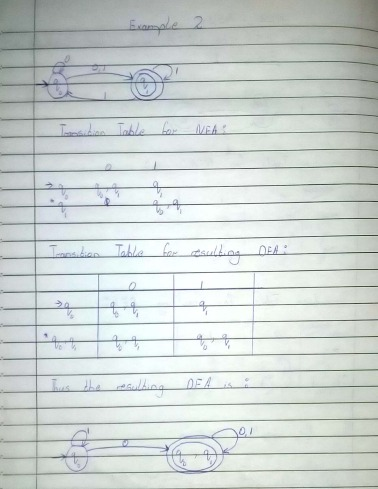

**QUESTION 2**

Show how to use Flex when building a simple lexical analyzer

In [ ]:
/*** Definition Section has one variable
which can be accessed inside yylex()
and main() ***/
/* Declaration */

%{
int count_characters, count_nums, count_caps, count_small, count_marks, count_space = 0;
%}
 
/* Rules */
/* Rule 1: finds small letters
 * Rule 2: finds capital letters
 * Rule 3: finds numbers
 * Rule 4: finds punctuation marks
 * Rule 5: finds white spaces
*/
%%
[a-z] 					{printf("%s is a small letter\n", yytext); count_small++; count_characters++;}
[A-Z]						{printf("%s is a capital letter\n", yytext); count_caps++; count_characters++;}
[0-9]    					{printf("%s is a digit\n", yytext); count_nums++; count_characters++;}
["!"|"?"|"."|":"|";"]			{printf("%s is a punctuation mark\n", yytext); count_marks++; count_characters++;}
[" "]						{printf("%s is a whitespace\n", yytext); count_space++;}
\n       					{return 0;}
%%
 
/*** Code Section prints the number of
capital letter present in the given input***/
/* User SubRoutine */

int yywrap(){}

int main(){
 
// Explanation:
// yywrap() - wraps the above rule section
/* yyin - takes the file pointer
          which contains the input*/
/* yylex() - this is the main flex function
          which runs the Rule Section*/
// yytext is the text in the buffer
 
// Take input from file

FILE *fp;
char filename[50];
printf("Enter the filename: \n");
scanf("%s",filename);
fp = fopen(filename,"r");
yyin = fp;
 
yylex();
printf("\nNumber of characters in the given input: %d\n", count_characters);
printf("\nNumber of capital letters in the given input: %d\n", count_caps);
printf("\nNumber of small letters in the given input: %d\n", count_small);
printf("\nNumber of numbers in the given input: %d\n", count_nums);
printf("\nNumber of punctuation marks in the given input: %d\n", count_marks);
printf("\nNumber of spaces in the given input: %d\n", count_space);

return 0;
}

An example of the output on the command line:


1.   The input file (maria.l) contains the following line of text:" 101 This * little ! light * of ! MINE 101 "
2.   The output below indicates how the simple lexical analyzer is able to identify the small letters, capital letters, numbers, punctuation marks and white spaces





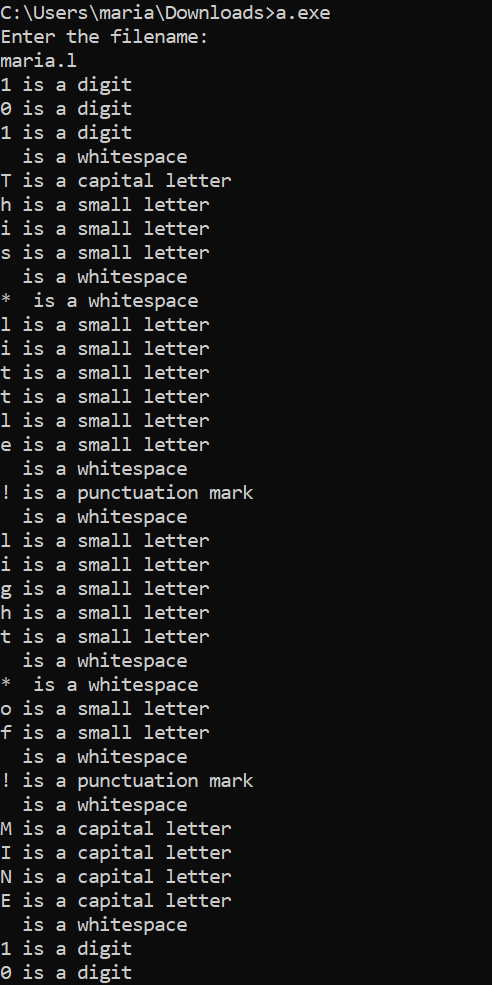

## **LAB ACTIVITY 4**

**QUESTION ONE** : Using an example or illustration, explain what is predictive parsing?

Predictive parsing is a simple form of recursive descent parsing in which the lookahead symbol unambiguously determines the flow of control through the function body for each nonterminal. Predictive parsing works only on grammars where the first terminal symbol of each subexpression provides enough information to choose which production to use.

Example: A procedure corresponding to nonterminal A recognizes an instance of A in the input stream. To recognize a nonterminal B on some right-hand side for A, the parser invokes the procedure corresponding to B. Thus, the grammar itself serves as a guide to the parser’s implementation.

The body of the function follows the right-hand sides of the corresponding rules whereby non-terminals result in a call to another parse procedure, while terminals result in considering the next token.

**QUESTION TWO :** As an extension to question 1, (a) What is LL (1) parsing? (b) Why do we get the First () and Follow () i.e. what do these two functions Really Represent?

PART A: An LL(k) class is a set of grammars which can construct predictive parsers looking k symbols ahead in the input.

LL(1) stands for Left-to-right parse, Leftmost derivation, 1 symbol lookahead. LL(1) parsing involves grammars considered to be a subset of context free grammars that are easy to parse with simple algorithms. A grammar is considered to be LL (1) if it can be parsed by selecting only one non-terminal and the next token in the input stream and the grammar cannot contain left recursion.

Part B: First() and Follow() functions aid in the construction of top-down parsers by considering which production to apply based on the next input symbol. First(A) shows the set of terminals, including £(epsilon), that could potentially appear at the beginning of any derivation of A. Follow(A) shows the set of terminals, including $, that could potentially occur after any derivation of the non-terminal A.

**QUESTION THREE :** Are there any unique attributes associated with Top-Down parsing?

Top-down parsing involves beginning with the start symbol, and then applying rules in the CFG to expand non-terminals until reaching the desired sentence.

Top-down parsing is considered popular since efficient parsers can be constructed more easily by hand using top-down methods.

The parse tree is constructed:

From the top
From left to right


## **LAB ACTIVITY 5**

**QUESTION ONE** : Review what syntax analysis is and in a few words, describe what this phase of compiler
construction entails.

Syntax Analysis (Parsing) is the second stage of the compiler’s front end, and its role is to determine if the input program, represented by the string of token names produced by the Lexical Analyzer (Scanner), is a valid sentence in the programming language (grammar of the source language). This is achieved through the parser attempting to build a derivation for the input program, using a grammar of the source language. To summarise, syntax analysis involves parsing the phrase structure of the program.

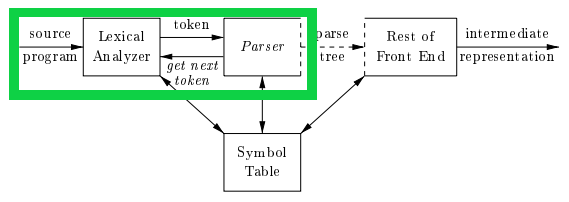

**QUESTION TWO** : Using Flex (lexical analyzer) and Bison (yacc), show how one can develop a simple
syntax analyzer.

The construction of a syntax analyser entails the processes of lexical analysis and parsing. 
In the process of lexical analysis, the input is broken down into subsequent tokens, which are fed into the syntax analyser to check the conformity of the input to the defined CFG.

Consider the below lexical analyser of a simple calculator:

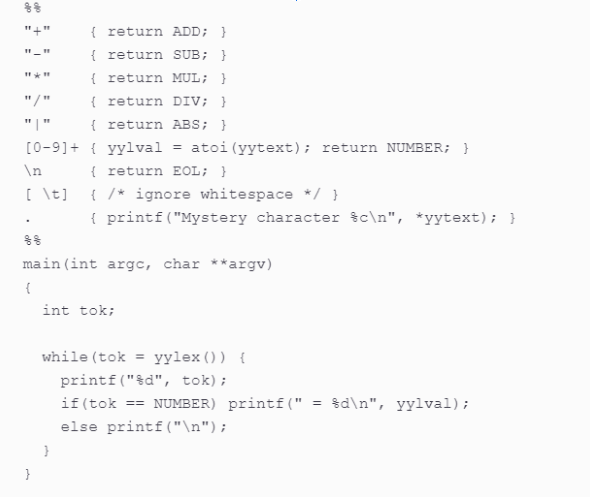

Maintaining focus on the rules section of the lexical analyser, this program recognizes different characters and matches them to a name, e.g, the “+” symbol becomes “ADD”. The above program is stored as a .l file.
To write a parser (.y file), it is necessary to describe rules that the parser uses to convert a sequence of tokens to a parse tree. This is performed with a Context-Free Grammar that is formed using the Backus-Naur Form (BNF) standard. For example:

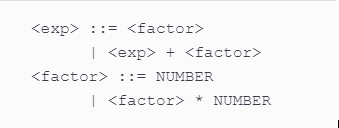

The above image represents a CFG with each line explaining how to create a branch of the parse tree. The ::= can be read “is a” or “becomes”


**Bison’s Rule Input Language**

Bison rules are basically BNF. Consider the below bison program in the following cell:




In [ ]:
%{
#include <stdio.h>
%}
/* declare tokens */
%token NUMBER
%token ADD SUB MUL DIV ABS
%token EOL

%%
calclist: /* nothing */                     
 | calclist exp EOL { printf("= %d\n", $2); }
 ;
exp: factor 
 | exp ADD factor { $$ = $1 + $3; }
 | exp SUB factor { $$ = $1 - $3; }
 ;
factor: term 
 | factor MUL term { $$ = $1 * $3; }
 | factor DIV term { $$ = $1 / $3; }
 ;
term: NUMBER
 | ABS term   { $$ = $2 >= 0? $2 : - $2; }
;
%%
main(int argc, char **argv)
{
  yyparse();
}
yyerror(char *s)
{
  fprintf(stderr, "error: %s\n", s);
}

Bison programs have the same syntax as lexical analysis programs, i.e, they contain a declaration section, enclosed in %{ //declarations }%, a rules section enclosed in %% //rules %% and a subroutine section.

The bison program performs the parsing by checking input syntax against the specified rules of the CFG.


## **LAB ACTIVITY 6**

**Do a quick summary of the front end.
In this activity, use a string example e.g. x+2*y to show the work of the various phases of the front end.**

The compiler has two modules namely the front end and the back end. Front-end constitutes the Lexical analyzer, semantic analyzer, syntax analyzer, and intermediate code generator. And the rest are assembled to form the back end. 


**Lexical Analyzer**

Lexical Analysis is the first phase when the compiler scans the source code. This process can be left to right, character by character, and group these characters into tokens.
It takes the output of the preprocessor as the input which is in a pure high-level language. Tokens are defined by regular expressions which are understood by the lexical analyzer. It also removes lexical errors, comments, and white space.

For example:
x+2*y

"x" - Identifier

"+" - Addition Operator

"2" - Number

"*" - Multiplication Operator

"y" - Identifier



**Syntax Analyzer**

Syntax analysis is based on the rules based on the specific programming language by constructing the parse tree with the help of tokens. It also determines the structure of source language and grammar or syntax of the language.  Parse trees are generally constructed to check for ambiguity in the given grammar. There are certain rules associated with the derivation tree. 

For example:

The parse tree for the following statement (x+2*y) is as follows:

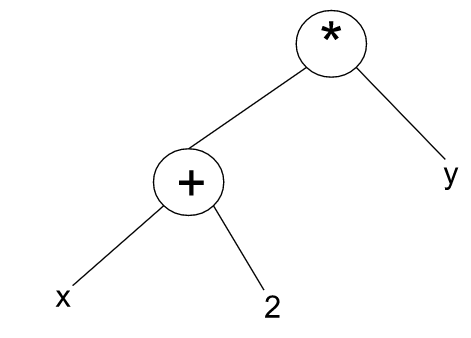



**Semantic Analyzer**

It uses the syntax tree of the previous phase along with the symbol table to verify that the given source code is semantically consistent. It verifies the parse tree, whether it’s meaningful or not. 

For example:

float x = 20.2;

float z = x+2*y;

In the above code, the semantic analyzer will typecast the integer 2 to float 2.0 before addition.



**Intermediate Code Generator**

It generates intermediate code, which is a form that can be readily executed by a machine. Once the semantic analysis phase is over the compiler generates intermediate code for the target machine. It represents a program for some abstract machine.
Intermediate code is between the high-level and machine level language. This intermediate code needs to be generated in such a manner that makes it easy to translate it into the target machine code.




## **LAB ACTIVITY 7**

1. Write the three address code (TAC) of the following:

	a. Any if-statement of your choice

	b. Any for-loop of your choice

	c. Any while-loop of your choice
  
2. Write the triple implementation of one of the TAC's in question 1 above

**QUESTION 1**

**a) IF  Statement**

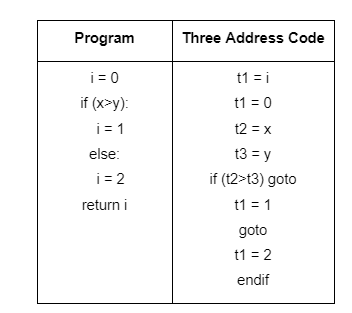


**b) FOR Loop**


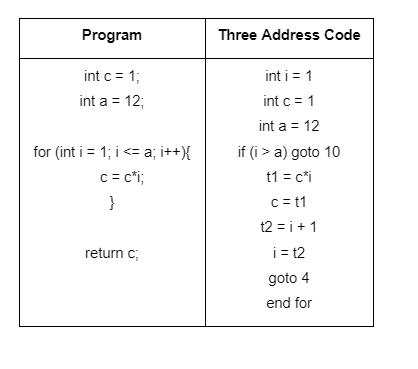



**c) WHILE Loop**

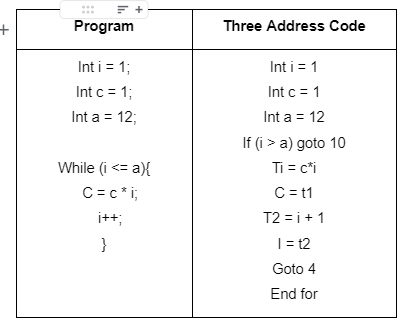

**QUESTION 2**

Triple Implementation for the IF Statement


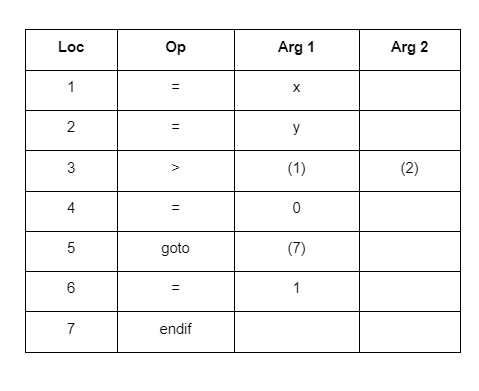

## **MINI PROJECT**

**INTRODUCTION**

For our mini project, we decided to implement a math interpreter that evaluates mathematical operations. This project also helped us appreciate high level languages and their ability to implement interpreters using inbuilt functions.

**SECTION 1: LEXER**

This is the first phase of our interpreter that takes in input from the user and converts it into a series of tokens. There are two types of tokens namely Number tokens and Operator tokens. In the *tokens.py* file, we define the types of tokens within our interpreter as illustrated below:

In [ ]:
from enum import Enum
from dataclasses import dataclass

class TokenType(Enum):
    NUMBER = 0
    PLUS = 1
    MINUS = 2
    MULTIPLY = 3
    DIVIDE = 4
    LPAREN = 5
    RPAREN = 6

@dataclass  ## the class can hold any fields and values eg Object or Struct type
class Token:
    type: TokenType
    value: any = None

    def __repr__(self):
        return self.type.name + (f":{self.value}" if self.value != None else "")

The *lexer.py* file enables us to handle the generation of tokens from the user input through the Lexer Class. The three methods implemented within the class are *generate_tokens()*, *generate_number()*, and *advance()*.

*generate_tokens()*: this method is used for producing tokens and the parameter for this method is the instantiated object the lexer class which has a text attribute that will be used in token generation. If numerical characters are identified, the generate_number() method is called which handles the production of numerical tokens. Since our method will be required to produce multiple tokens, we use a generator that acts on an object being iterated hence the reason why we implement ‘yield’ instead of ‘return’. This allows the if…else statement to pick up from where it left during each call cycle. Moreover, the operator tokens have no value hence the reason why they are generated in this method and identified through an if...else loop. Characters that are not specified are considered illegal and trigger an exception statement.

*generate_number()*: this method helps with generating numerical tokens. Checks are also implemented to detect the number of decimal points precent in the user input. If there are more that one decimal points in a series of digits, the method stops and returns the number token. Additionally, there is also a measure that helps with identifying whether a number begins or ends with a decimal point allowing the user input to omit zeros (eg .254, 777.).

*advance()*: this method is used to loop through the characters found in the input.

The code shown below is from the lexer.py file.


In [ ]:
from tokens import Token, TokenType

WHITESPACE = ' \n\t'
DIGITS = '0123456789'

class Lexer:
    def __init__(self, text):
        self.text = iter(text)
        self.advance()

    def advance(self):
        try:
            self.current_char = next(self.text)
        except StopIteration:
            self.current_char = None

    def generate_tokens(self):                      # Generates tokens
        while self.current_char != None:
            if self.current_char in WHITESPACE:
                self.advance()
            elif self.current_char == '.' or self.current_char in DIGITS:
                yield self.generate_number()        # Yield is used since we are generating many tokens
            elif self.current_char == '+':
                self.advance()
                yield Token(TokenType.PLUS)
            elif self.current_char == '-':
                self.advance()
                yield Token(TokenType.MINUS)
            elif self.current_char == '*':
                self.advance()
                yield Token(TokenType.MULTIPLY)
            elif self.current_char == '/':
                self.advance()
                yield Token(TokenType.DIVIDE)
            elif self.current_char == '(':
                self.advance()
                yield Token(TokenType.LPAREN)
            elif self.current_char == ')':
                self.advance()
                yield Token(TokenType.RPAREN)
            else:
                raise Exception(f"Illegal Character '{self.current_char}'")
    
    def generate_number(self):
        decimal_point_count = 0
        number_str = self.current_char
        self.advance()

        while self.current_char != None and (self.current_char == "." or self.current_char in DIGITS):
            if self.current_char == '.':
                decimal_point_count += 1
                if decimal_point_count > 1:
                    break                           # End of token
                
            number_str += self.current_char
            self.advance()                          # Go to the next char since the entire str is constructed

        if number_str.startswith('.'):
            number_str = '0' + number_str

        if number_str.endswith('.'):
            number_str += '0'

        return Token(TokenType.NUMBER, float(number_str))

Lexer Output:

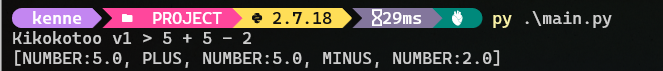

**SECTION 2: PARSER**

The parser consumes the generated tokens and identifies the operations that need to be executed. This is achieved through defining grammar rules that will be used to enforce BODMAS when evaluating user input. 

The rules defined are:
a)*Factor Rule*: identifies tokens that are in numerical form. (Eg. 7, +7, -7).

b)*Term Rule*: identifies the multiply and divide operands which have a high precedence. The rule format is: Term = Factor * Factor OR Term = Factor / Factor.

c)*Expression Rule*: identifies the plus and minus operand which have a low precedence. The rule format is: Expression = Term + Term OR Expression = Term – Term.

Each expression or term can have zero or more operators (Eg. 7 - - 7).

*nodes.py*: this file helps us define the types of nodes in the syntax tree. The node classes are based on the operands ‘+’, ‘-’. ‘*’, ‘/' as illustrated below:

In [ ]:
from dataclasses import dataclass

@dataclass
class NumberNode:
    value: float

    def __repr__(self):
        return f"{self.value}"
    
@dataclass
class AddNode:
    node_a: any
    node_b: any

    def __repr__(self) -> str:
        return f"({self.node_a}+{self.node_b})"

@dataclass
class SubtractNode:
    node_a: any
    node_b: any

    def __repr__(self) -> str:
        return f"({self.node_a}-{self.node_b})"

@dataclass
class MultiplyNode:
    node_a: any
    node_b: any

    def __repr__(self) -> str:
        return f"({self.node_a}*{self.node_b})"

@dataclass
class DivideNode:
    node_a: any
    node_b: any

    def __repr__(self) -> str:
        return f"({self.node_a}/{self.node_b})"

@dataclass
class PlusNode:
    node: any

    def __repr__(self):
        return f"(+{self.node})"

@dataclass
class MinusNode:
    node: any

    def __repr__(self):
        return f"(-{self.node})"

*parser.py*: this file is used to transform the generated tokens into nodes. A tree of nodes is the main output produces from this class using the parse() method. The grammar rules defined above are also implemented in this file.

In [ ]:
from tokens import TokenType
from nodes import *

class Parser: 
    def __init__(self, tokens):
        self.tokens = iter(tokens)
        self.advance()

    def raise_error(self):
        raise Exception("Invalid Syntax")

    def advance(self):
        try:
            self.current_token = next(self.tokens)
        except:
            self.current_token = None
    def parse(self):
        if self.current_token == None:
            return None

        result = self.expr()

        if self.current_token != None:
            self.raise_error()
        
        return result

    def expr(self):     #Expression Rules
        result = self.term()

        while self.current_token != None and self.current_token.type in (TokenType.PLUS, TokenType.MINUS):
            if self.current_token.type == TokenType.PLUS:
                self.advance()
                result = AddNode(result, self.term())
            elif self.current_token.type == TokenType.MINUS:
                self.advance()
                result = SubtractNode(result, self.term())

        return result
    
    def term(self):     #Term Rules
        result = self.factor()

        while self.current_token != None and self.current_token.type in (TokenType.MULTIPLY, TokenType.DIVIDE):
            if self.current_token.type == TokenType.MULTIPLY:
                self.advance()
                result = MultiplyNode(result, self.factor())
            elif self.current_token.type == TokenType.DIVIDE:
                self.advance()
                result = DivideNode(result, self.factor())

        return result

    def factor(self):   #Factor Rules
        token = self.current_token

        if token.type == TokenType.LPAREN:
            self.advance()
            result = self.expr()

            if self.current_token.type != TokenType.RPAREN:
                self.raise_error()
            self.advance()
            return result
            
        elif token.type == TokenType.NUMBER:
            self.advance()
            return NumberNode(token.value)
        elif token.type == TokenType.PLUS:
            self.advance()
            return PlusNode(self.factor())
        elif token.type == TokenType.MINUS:
            self.advance()
            return MinusNode(self.factor())

        self.raise_error()

Parser Output:

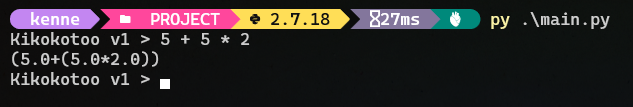

**SECTION 3: INTERPRETER**

This module has two files: *values.py* and *interpreter.py*.

*values.py*: this file is used to hold that value types that the interpreter is able to produce. The type of value that the interpreter can produce is a number hence the number data class is defined in this file as shown below:

In [ ]:
from dataclasses import dataclass

@dataclass
class Number:
    value: float
    def __repr__(self):
        return f"{self.value}"

*interpreter.py*: this file handles the evaluation of the nodes produced by the parser class and returns a value. The main method implemented in this file is the *visit()*.

*visit()*: this method traverses through the generated tree by consuming the root node of the tree. The tree is then processed and a number is returned which represents the answer of the mathematical expression that has been evaluated. The nodes that are processed are based in the operands Add, Subtract, Multiply, and divide and also the Number node itself which will return a number based on the factor rule. 
NB: When visiting the divide node, users must be prevented from dividing numbers by zero. This is achieved through wrapping the return function of the *visit_DivideNode()* in a try…catch statement and raising an exception when a math error occurs.


In [ ]:
from nodes import *
from values import Number

class Interpreter:
    def visit(self, node):
        method_name = f'visit_{type(node).__name__}'
        method = getattr(self, method_name)
        return method(node)
    
    def visit_NumberNode(self, node):
        return Number(node.value)
    
    def visit_AddNode(self, node):
        return Number(self.visit(node.node_a).value + self.visit(node.node_b).value)

    def visit_SubtractdNode(self, node):
        return Number(self.visit(node.node_a).value - self.visit(node.node_b).value)
    
    def visit_MultiplyNode(self, node):
        return Number(self.visit(node.node_a).value * self.visit(node.node_b).value)
    
    def visit_DivideNode(self, node):
        try:
            return Number(self.visit(node.node_a).value / self.visit(node.node_b).value)
        except:
            raise Exception("Runtime Math Error!")
    
    def visit_PlusNode(self, node):
        return self.visit(node.node)

    def visit_MinusNode(self, node):
        return Number(-self.visit(node.node).value)

Division by zero Output:

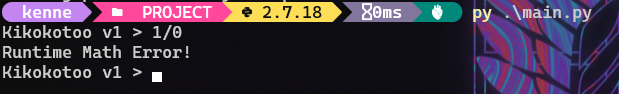

**KIKOKOTOO v1 (MAIN FILE)**
*kikotoo.py* is the main file of the interpreter. When run, the user can input mathematical expressions that need to be evaluated. The program runs in the terminal.

In [ ]:
from lexer import Lexer
from parser_ import Parser
from interpreter import Interpreter

while True:
    try:
        text = input("Kikokotoo v1 > ")
        lexer = Lexer(text)
        tokens = lexer.generate_tokens()
        parser = Parser(tokens)
        tree = parser.parse()
        if not tree: continue       #if the user doesn't type anything, ignore
        interpreter = Interpreter()
        value = interpreter.visit(tree)
        print(value)
    except Exception as e:
        print(e)

Interpreter Output:

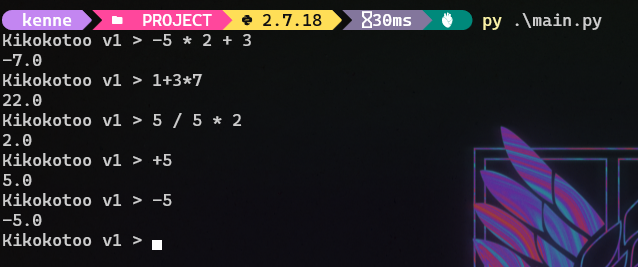

**References**

Brown, A. (2011). Tutorial: Writing an interpreter with PyPy, part 1. Tutorial: Writing an Interpreter with PyPy, Part 1. Retrieved November 25, 2022, from https://morepypy.blogspot.com/2011/04/tutorial-writing-interpreter-with-pypy.html 
